In [2]:
import pandas as pd
from openai import OpenAI
from functools import partial
client = OpenAI()

def get_embedding(text: str, model="text-embedding-3-small"):
   return client.embeddings.create(input = [text], model=model, dimensions=2).data[0].embedding

In [3]:
outputs_df = pd.read_parquet("../data/processed/outputs_openai_embeddings_v1.parquet")


In [6]:
outputs_df["embedding_small_2d"] = outputs_df.output_text_clean.apply(get_embedding)


In [16]:
def get_embedding(text: str, model="text-embedding-3-small"):
   return client.embeddings.create(input = [text], model=model, dimensions=1).data[0].embedding

outputs_df["embedding_small_1d"] = outputs_df.output_text_clean.apply(get_embedding)

In [8]:
def list_col_to_df(list_col: pd.Series, prefix: str):
    list_df = pd.DataFrame(
        list_col.to_list(),
        index=list_col.index
        ).add_prefix(prefix)
    return list_df

outputs_df = outputs_df.join(list_col_to_df(outputs_df.embedding_small_2d, "embedding_small_"))

In [12]:
import math


# math.atan2(outputs_df["embedding_small_1"], outputs_df["embedding_small_0"])

In [14]:
outputs_df["angle_radians"] = outputs_df.apply(lambda row: math.atan2(row["embedding_small_1"], row["embedding_small_0"]), axis=1)

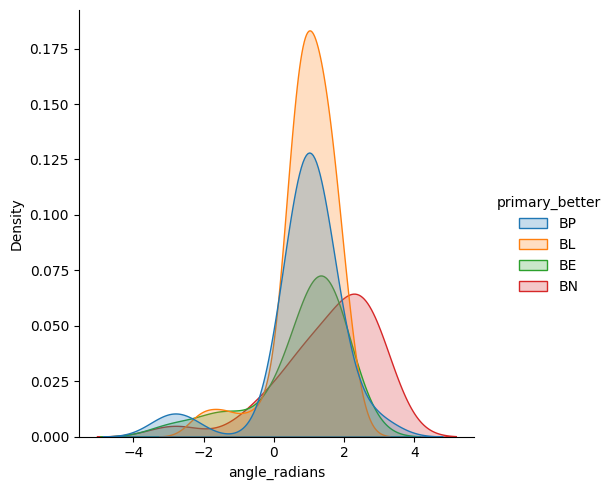

In [15]:
import seaborn as sns

sns.displot(outputs_df, x="angle_radians", hue="primary_better", kind="kde", fill=True)


In [9]:
import plotly.express as px
px.scatter(outputs_df, x="embedding_small_0", y="embedding_small_1", color="primary_better", title="OpenAI Text Embeddings 2D Projection")

In [20]:
outputs_df.test_set.value_counts()

test_set
False    73
True     40
Name: count, dtype: int64